<a href="https://colab.research.google.com/github/nijinpaul/Assignments/blob/main/ASSIGNMENT_ASSOCIATION_RULES_(MY_MOVIES_DATASET)Rev0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prepare rules for the all the data sets 
1. Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2. Change the minimum length in apriori algorithm
3. Visualize the obtained rules using different plots 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [2]:
df = pd.read_csv("/content/my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
df.shape

(10, 15)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [4]:
df.drop(['V1','V2','V3','V4','V5'],axis=1,inplace=True)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [5]:
# creating total of each movie bought
s=df.sum()
s

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

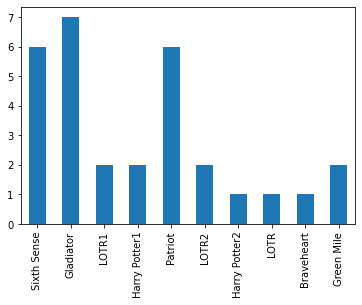

In [6]:
s.plot.bar()

Sixth Sense,Gladiator and Patriot are the top three most bought movies.

#1. Association rules with 10% Support and 70% confidence

In [37]:
 #with 10% support
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [38]:
# 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(Green Mile, LOTR2, LOTR1, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
246,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR2),"(Green Mile, Sixth Sense, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(Sixth Sense, LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [39]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(Green Mile, LOTR2, LOTR1, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
246,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR2),"(Green Mile, Sixth Sense, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(Sixth Sense, LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


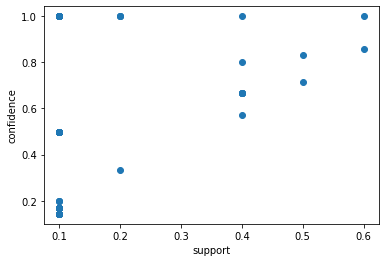

In [40]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

#2. Association rules with 5% Support and 90% confidence

In [41]:
 #with 5% support
frequent_itemsets2=apriori(df,min_support=0.05,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [42]:
# 90% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(Sixth Sense),"(Green Mile, LOTR2, LOTR1, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
234,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(LOTR2),"(Green Mile, Sixth Sense, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Harry Potter1),"(Sixth Sense, LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [43]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(Sixth Sense),"(Green Mile, LOTR2, LOTR1, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
234,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(LOTR2),"(Green Mile, Sixth Sense, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Harry Potter1),"(Sixth Sense, LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


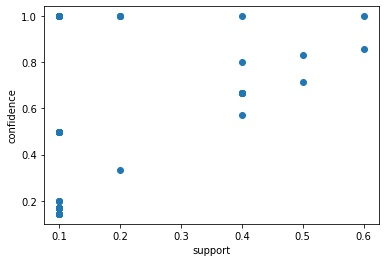

In [44]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()